In [1]:
# Importing the Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing an inbuilt dataset from sns
tips = sns.load_dataset("tips")

In [4]:
# View couple of rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

In [6]:
# Does size have an impact on tip paid
tips["size"].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

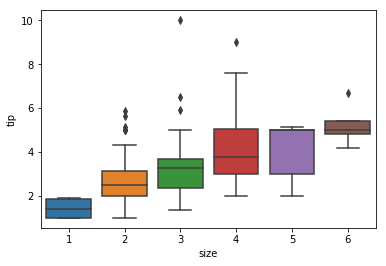

In [8]:
sns.boxplot(x = tips["size"], y  = tips["tip"])

In [12]:
# Find the tip amount of all those people where the size = 2
tips[tips["size"]==2]["tip"].describe() # Min $1 & max $5.85

count    156.000000
mean       2.582308
std        0.985501
min        1.000000
25%        2.000000
50%        2.500000
75%        3.145000
max        5.850000
Name: tip, dtype: float64

In [13]:
# Find the tip amount of all those people where the size = 2
tips[tips["size"]==3]["tip"].describe() # Min $1 & max $10

count    38.000000
mean      3.393158
std       1.557344
min       1.360000
25%       2.357500
50%       3.290000
75%       3.682500
max      10.000000
Name: tip, dtype: float64

In [14]:
# Find the tip amount of all those people where the size = 2
tips[tips["size"]==4]["tip"].describe() # Min $2 & max $9

count    37.000000
mean      4.135405
std       1.640668
min       2.000000
25%       3.000000
50%       3.760000
75%       5.070000
max       9.000000
Name: tip, dtype: float64

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


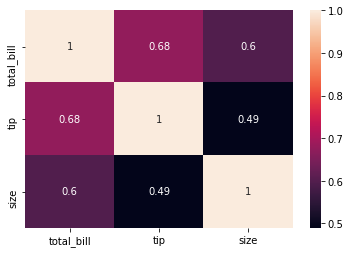

In [28]:
# plot the correlation
sns.heatmap(tips.corr(), annot=True)

In [29]:
# Find if the Sex has significant impact on the Tip Paid...
# Chi Square Test

# Null: Sex has no impact on the Tip Paid...

# Alt: It does have an impact....

# Prep the Data:: Step 01 : Find the Count of Gender
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### Model Building Stage

Prepping the Dataset

Convert the Data into OHE using pd.get_dummies()

Apply Standard Scaling on the Dataset to nullify the affect of Outliers and 
bringing the data into a single scale of measurement...

1. Linear Regression Model
2. Decision Tree Model
3. Random Forest Model

Try to Ensemble them by taking average....and see if taking avg impacts the RMSE

4. Bagging Model
5. Adaboost Model
6. Gradient Boosting Model

Average it back again just to see if the RMSE goes down....

In [31]:
# Importing the machine learning libraries
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
# convert the data into OHE
newtips = pd.get_dummies(tips)

In [34]:
newtips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [35]:
# Standard Scaling...
sc = StandardScaler()

In [39]:
scaled_tip = pd.DataFrame(sc.fit_transform(newtips), columns=newtips.columns)

In [40]:
scaled_tip.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,-6.597637e-17,1.002056,-1.881547,-0.724711,-0.224101,0.488686,3.492068
tip,244.0,2.846297e-16,1.002056,-1.447189,-0.722971,-0.071175,0.408619,5.070772
size,244.0,-1.410529e-16,1.002056,-1.653768,-0.600193,-0.600193,0.453383,3.614110
sex_Male,244.0,-2.275047e-17,1.002056,-1.343353,-1.343353,0.744406,0.744406,0.744406
sex_Female,244.0,2.275047e-17,1.002056,-0.744406,-0.744406,-0.744406,1.343353,1.343353
smoker_Yes,244.0,1.456030e-16,1.002056,-0.784789,-0.784789,-0.784789,1.274228,1.274228
smoker_No,244.0,-1.328628e-16,1.002056,-1.274228,-1.274228,0.784789,0.784789,0.784789
day_Thur,244.0,2.447951e-16,1.002056,-0.583660,-0.583660,-0.583660,1.713325,1.713325
day_Fri,244.0,-4.595595e-17,1.002056,-0.290593,-0.290593,-0.290593,-0.290593,3.441236
day_Sat,244.0,3.357970e-16,1.002056,-0.744406,-0.744406,-0.744406,1.343353,1.343353


In [41]:
# Split the Data into Train and Test
x = scaled_tip.drop("tip", axis = 1)
y = scaled_tip["tip"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                    test_size = 0.30, random_state = 0)

In [42]:
# Linear Reg, Decision tree and Randmom Forest...
lm  = LinearRegression()

In [43]:
lm_model = lm.fit(xtrain,ytrain).predict(xtest)

In [44]:
np.sqrt(mean_squared_error(ytest,lm_model))

0.7077653806084409

In [48]:
dtree = DecisionTreeRegressor(random_state=0)

In [49]:
tree_model = dtree.fit(xtrain, ytrain).predict(xtest)

In [50]:
np.sqrt(mean_squared_error(ytest,tree_model))

1.1016658799420391

In [60]:
rf = RandomForestRegressor(random_state=0)

In [61]:
rf_model = rf.fit(xtrain, ytrain).predict(xtest)

In [62]:
np.sqrt(mean_squared_error(ytest,rf_model))

0.6804800684167512

In [67]:
# Take dcision tree and rf and average the values
np.sqrt(mean_squared_error(ytest,(lm_model+rf_model+bagg_model)/3))

0.6443919147224275

Combining Linear Model and Random Forest is giving me Low RMSE Level...

In [65]:
# Bagging Regressor
bagg = BaggingRegressor()
bagg_model = bagg.fit(xtrain,ytrain).predict(xtest)

In [66]:
np.sqrt(mean_squared_error(ytest,bagg_model))

0.6671644083598911

In [69]:
# Adaboost
ada = AdaBoostRegressor()
ada_model = ada.fit(xtrain, ytrain).predict(xtest)

In [70]:
np.sqrt(mean_squared_error(ytest,ada_model))

0.6614012286001345

In [71]:
np.sqrt(mean_squared_error(ytest,(lm_model+rf_model+bagg_model+ada_model)/4))

0.6373982603320185

### Adaboost keeping decision tree and random forest both

In [84]:
model_params = {"base_estimator":[rf], 
                "n_estimators":[25,50,100,150], 
                "learning_rate":[1.0,2.0,3.0], 
                "loss":["linear", "square", "exponential"], 
                "random_state":[0,1,2]}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Creating Grid Search
gridsrch = GridSearchCV(estimator=ada, param_grid=model_params, cv = 5)

In [87]:
# Applying it on Data to find the best parameters...
gridsrch.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         learning_rate=3.0, loss='exponential', n_estimators=100,
         random_state=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_estimator': [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction...ning_rate': [1.0, 2.0, 3.0], 'loss': ['linear', 'square', 'exponential'], 'random_state': [0, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_

In [77]:
# Best Parameters
gridsrch.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
 'learning_rate': 3.0,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': 0}

In [78]:
# Re define he Adaboost Model
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
 learning_rate=3.0,
 loss='exponential',
 n_estimators=100,
 random_state= 0)

In [81]:
ada_gridmodel = ada.fit(xtrain,ytrain).predict(xtest)

In [82]:
np.sqrt(mean_squared_error(ytest,ada_gridmodel))

0.7287155841262839

In [83]:
np.sqrt(mean_squared_error(ytest,(lm_model+rf_model+bagg_model+ada_gridmodel)/4))

0.6512357532085613

In [88]:
gridsrch.best_params_

{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
 'learning_rate': 3.0,
 'loss': 'exponential',
 'n_estimators': 150,
 'random_state': 0}

In [99]:
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
 learning_rate=1.0,
 loss='exponential',
 n_estimators=25,
 random_state=0)

In [100]:
ada_gridmodel = ada.fit(xtrain,ytrain).predict(xtest)

In [101]:
np.sqrt(mean_squared_error(ytest,ada_gridmodel))

0.7075714960611574